<a href="https://colab.research.google.com/github/farrelrassya/Practical-Statistics-for-Data-Scientist-Books/blob/main/PracticalStatisticsChapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pylab as plt

In [19]:
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv"
url1 = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/sp500_data.csv.gz"
loans_income = pd.read_csv(url)
sp500_px = pd.read_csv(url1)
print(loans_income.head())


        x
0   67000
1   52000
2  100000
3   78762
4   37041


In [20]:
print(sp500_px.head())

   Unnamed: 0  ADS        CA      MSFT  RHT  CTSH       CSC       EMC  \
0  1993-01-29  0.0  0.060124 -0.022100  0.0   0.0  0.018897  0.007368   
1  1993-02-01  0.0 -0.180389  0.027621  0.0   0.0  0.018889  0.018425   
2  1993-02-02  0.0 -0.120257  0.035900  0.0   0.0 -0.075573  0.029482   
3  1993-02-03  0.0  0.060124 -0.024857  0.0   0.0 -0.151128  0.003689   
4  1993-02-04  0.0 -0.360770 -0.060757  0.0   0.0  0.113350 -0.022114   

        IBM       XRX  ...  WAT  ALXN     AMGN  BXLT     BIIB     CELG  \
0  0.092165  0.259140  ...  0.0   0.0  0.34716   0.0  0.04167  0.00000   
1  0.115207 -0.100775  ...  0.0   0.0 -0.23144   0.0  0.00000 -0.01041   
2 -0.023041  0.028796  ...  0.0   0.0 -0.11572   0.0  0.00000  0.00000   
3 -0.253454 -0.043190  ...  0.0   0.0 -0.08679   0.0  0.04167 -0.04167   
4  0.069862  0.000000  ...  0.0   0.0  0.14465   0.0 -0.04166 -0.03126   

       GILD  REGN    VRTX  HSIC  
0  0.015564  1.75  0.1250   0.0  
1  0.007782  1.25  0.1250   0.0  
2 -0.007792 -0

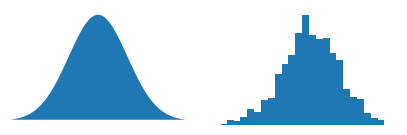

In [21]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

Population vs Sample: The population is theoretical and perfect (a PDF curve), while the sample is a representation that may not be perfect (a histogram). Data Quality in Statistics:
To ensure good representation, the sample must be randomly selected and sufficiently large.Otherwise, models or conclusions derived from the data may be skewed due to bias or poor data quality.
In statistics and data modeling, the quality of the sample (representative, large enough, bias-free) is more important than simply the quantity of data.

##Sampling Distribution of a Statistic
The term sampling distribution of a statistic refers to the distribution of some sample statistic over many samples drawn from the same population. Much of classical statistics is concerned with making inferences from (small) samples to (very large) populations.

In [25]:
loans_income = pd.read_csv(url).squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
33798   89000.0  Data
36591   80000.0  Data
36202   37500.0  Data
37792   56000.0  Data
32112  156000.0  Data


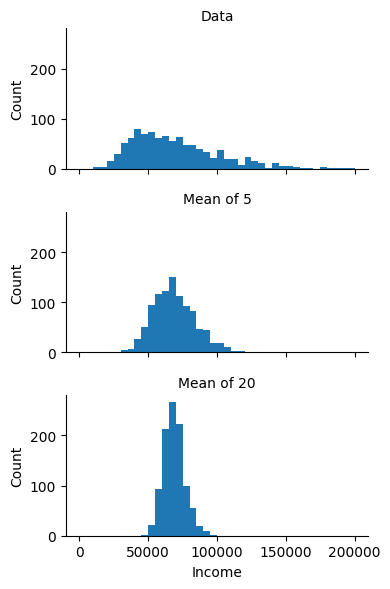

In [26]:
g = sns.FacetGrid(results, col='type', col_wrap=1,
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

When drawing a sample to measure something `using a sample statistic` or to build a model `statistical or machine learning`, there is always a risk of error due to sampling variability. This occurs because the result may differ if another sample is taken. Ideally, with abundant data, additional samples could be drawn to observe the distribution of the sample statistic directly.

Sample statistics, such as the mean, generally exhibit a more regular, bell-shaped distribution compared to the data itself. This effect becomes more pronounced with larger sample sizes. Additionally, larger samples result in a narrower and more stable distribution of the sample statistic.

For large $ n $ the sampling distribution of the sample mean approaches a normal distribution:

$$
\bar{x} \sim N\left(\mu, \frac{\sigma}{\sqrt{n}}\right)
$$

Where:  
- $ \bar{x} $ Sample mean  
- $ \mu $ Population mean  
- $ \frac{\sigma}{\sqrt{n}} $ Standard error of the mean  


##The Bootstrap

Bootstrap is a resampling technique used to estimate the distribution of a statistic (like the mean, median, or standard deviation) by repeatedly sampling, with replacement, from the observed data. It allows you to assess the variability or uncertainty of a sample statistic without making strong assumptions about the underlying population.

The bootstrap estimate for a statistic $theta$ after generating $ B $ resamples is:

$$
\hat{\theta}_{\text{bootstrap}} = \frac{1}{B} \sum_{i=1}^{B} \theta^*(i)
$$

Where:
- $ \theta^*(i) $ is the statistic calculated from the \(i\)-th bootstrap sample,
- $ B $ is the total number of resamples.


In [27]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -87.31100000000151
std. error: 237.0956296868779


## Confidence Intervals
The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.

The bootstrap is a general tool that can be used to generate confidence intervals for most statistics, or model parameters. Statistical textbooks and software, with roots in over a half century of computerless statistical analysis, will also reference confidence intervals generated by formulas, especially the t-distribution

For calculating confidence intervals, you generally use these formulas depending on the data and distribution type.

1. **For population mean when variance is known**:
   The formula is:
   
   $$ \mu = \bar{x} \pm Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}} $$

   - $ \bar{x} $ = sample mean
   - $ Z_{\alpha/2} $ = critical Z-value for the desired confidence level (e.g., for 95% confidence, Z = 1.96)
   - $ \sigma $ = population standard deviation
   - $ n $ = sample size

2. **For population mean when variance is unknown (using t-distribution)**:
   The formula changes slightly:

   $$ \mu = \bar{x} \pm t_{\alpha/2} \times \frac{s}{\sqrt{n}} $$

   - $ t_{\alpha/2} $ = critical t-value from the t-distribution (depending on degrees of freedom)
   - $ s $ = sample standard deviation

These formulas give you the confidence interval.


68760.51844
55734.1


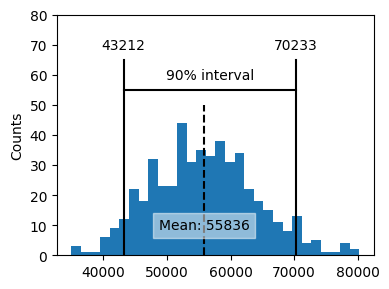

In [28]:
print(loans_income.mean())
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

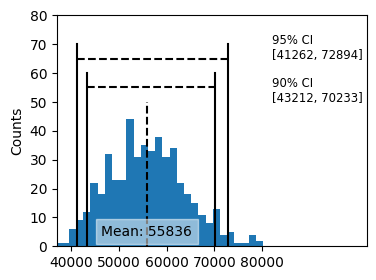

In [29]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50,
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65,
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

A QQ plot `Quantile-Quantile plot` is a graphical tool to compare the distribution of a dataset to a theoretical distribution, or to compare two datasets to each other. It is often used to check if the data follows a certain distribution, such as the normal distribution.

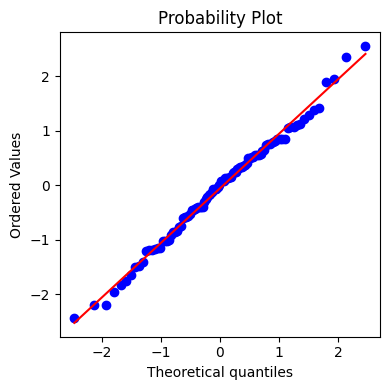

In [37]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

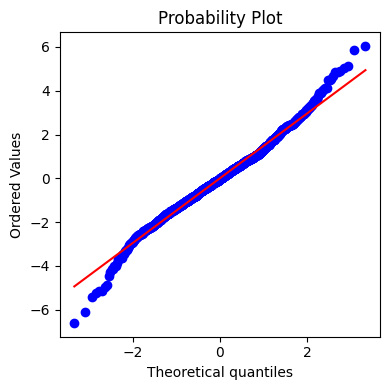

In [38]:
sp500_px = pd.read_csv(url1)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

In [39]:
print(stats.binom.pmf(2, n=5, p=0.1))

0.07289999999999992


The binomial distribution assumes that each trial is independent and that there are only two possible outcomes: success or failure. So, the PMF `Probability Mass Function` function calculates the probability of getting exactly 2 successes in 5 trials, where the probability of success in each trial is 0.1.

In [40]:
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


The Cumulative Distribution Function `CDF` gives you the probability that the number of successes will be less than or equal to a certain value. In this case, cdf(2) will give you the probability of having 2 or fewer successes in 5 trials, with a 10% chance of success per trial.



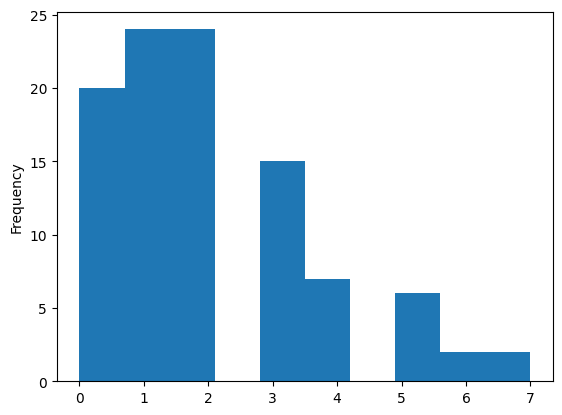

In [41]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

The Poisson distribution is a probability distribution that describes the number of events occurring in a fixed interval of time or space, given that these events happen with a known constant mean rate, and are independent of each other.

Key Properties of Poisson Distribution:
Discrete:
1. The Poisson distribution is discrete, meaning it deals with counting the number of events (e.g., 0, 1, 2, 3, …).
2. Parameter: It has one key parameter, λ (lambda), which is the average number of events that occur in a given interval.
λ (lambda): The average number of occurrences (or rate) in a fixed period of time or space.
3. Event Independence: The events are assumed to happen independently of each other.
4. Constant Rate: The average rate (λ) of events is constant over time or space.

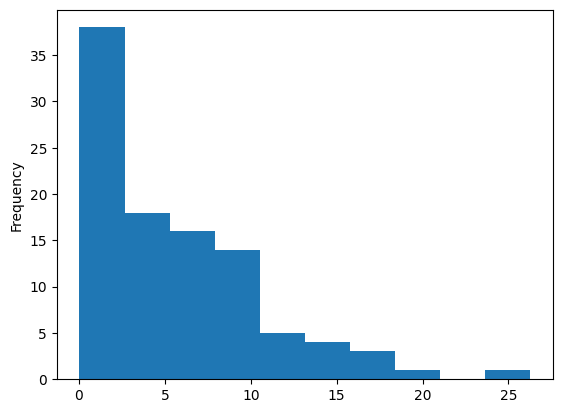

In [42]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

The Exponential distribution is a continuous probability distribution that models the time between events in a process where events happen continuously and independently at a constant average rate. It is often used to model waiting times or the time until the next event occurs in processes like queues, reliability of systems, and lifespan of objects.

Key Properties of Exponential Distribution:
1. Continuous: Unlike the Poisson distribution, which is discrete, the Exponential distribution is continuous and describes the time between events.
2. Parameter: The Exponential distribution has one parameter, λ (lambda), which is the rate at which events occur. The mean and standard deviation of an Exponential distribution are both
1/λ.
3. Memoryless Property: The Exponential distribution has a unique "memoryless" property, meaning that the probability of the next event occurring in the future is independent of how much time has already passed. This makes it different from distributions like the Normal or Poisson distributions.


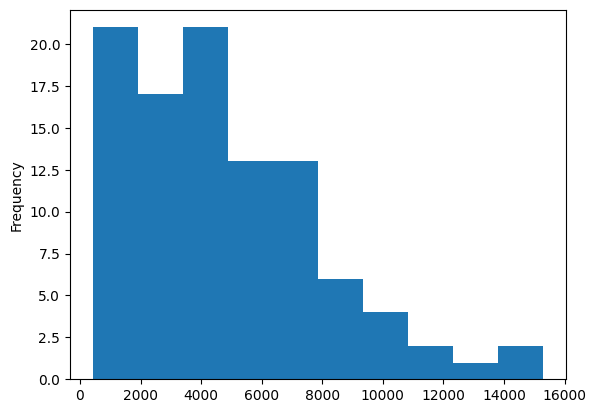

In [43]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()

The Weibull distribution is a continuous probability distribution that is widely used in reliability analysis, survival studies, and modeling the life span of systems or objects. It is particularly useful because it can model various types of data, including the time until failure or the duration of an event, and it generalizes other distributions, like the Exponential and Rayleigh distributions.

Key Features of the Weibull Distribution:
1. Shape Parameter (k): The Weibull distribution has a shape parameter (k), which determines the "shape" of the distribution's probability density function (PDF). It controls the distribution's behavior.

  If k = 1, the Weibull distribution becomes the Exponential distribution (memoryless property).

  If k < 1, the distribution exhibits light tails and models "early failure" scenarios.
  
  If k > 1, the distribution exhibits heavy tails and models "wear-out" failures (i.e., objects tend to fail after long usage).
2. Scale Parameter (λ): The scale parameter (λ) is another important parameter that stretches or compresses the distribution. It scales the distribution along the x-axis.

3. Flexibility: The Weibull distribution is very flexible because the shape parameter allows it to represent a variety of failure rates, including constant, increasing, or decreasing hazard rates.